In [1]:
# import the required libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size' : 18, 'font.family' : 'Times New Roman', "text.usetex": True})
#plt.rcParams.update(plt.rcParamsDefault)

In [2]:
## Define the Simulation parameters
L = 1; # Length of the domain
Gamma = 0.2; # Gamma value
rho = 1; # Density
u = 10; # Velocity
phi_0 = 1; # Phi at point x = 0
phi_L = 2; # Phi at point x = L

n = 512; # Number of cells

Pe = (rho * u * L)/Gamma; # Peclet Number

In [3]:
Pe

50.0

In [4]:
# create list of size n
D = [0]*n
beta = [0]*n
alpha = [0]*n
c = [0]*n
A = [0]*n
C = [0]*n
X = [0]*n
XA = [0]*n
XX = [0]*n
Err = [0]*n

# calculate dx, D and F
dx = L/n
x = Gamma/dx
y = rho*u

In [5]:
# create tdma function
# Define TDMA function very specific to this numerical solver, for general tdma solver refer : https://github.com/novus-afk/TDMA-Solver
def TDMA(n, beta, D, alpha, c):
    beta[0] = 0
    beta[n-1] = beta[1]
    alpha[0] = alpha[1]
    alpha[n-1] = 0
    # copy common values
    for i in range(2, n-1):
        D[i] = D[1]
        beta[i] = beta[1]
        alpha[i] = alpha[1]
    # solve forward substitution
    for i in range(0, n):
        A[i] = alpha[i]/(D[i] - beta[i]*A[i-1])
        C[i] = (beta[i]*C[i-1] + c[i])/(D[i] - beta[i]*A[i-1])

    X[n-1] = C[n-1]
    # solve backward substitution
    j = n-2
    while j >= 0:
        X[j] = A[j] * X[j+1] + C[j]
        j = j-1

    return X

In [6]:
# Create convection diffusion function 
def CD():
    D[0] = (3*x)+y/2
    D[1] = 2*x
    D[n-1] = (3*x)-y/2

    beta[1] = x+y/2
    alpha[1] = x-y/2

    c[0] = ((2*x)+y)*phi_0
    c[n-1] = ((2*x)-y)*phi_L
    for i in range(1, n-1):
        c[i] = 0

In [7]:
# create upwind function
def UPWIND():
    D[0] = (3*x)+y
    D[1] = (2*x)+y
    D[n-1] = (3*x)+y

    beta[1] = x+y
    alpha[1] = x

    c[0] = ((2*x)+y)*phi_0
    c[n-1] = 2*x*phi_L
    for i in range(1, n-1):
        c[i] = 0

In [8]:
## Using Central difference scheme
CD()
temp = TDMA(n, beta, D, alpha, c)

In [9]:
# analytical solution
for w in range(0, n):
    XX[w] = dx*0.5 + (dx * w)
    n1 = rho * u * XX[w] / Gamma
    n2 = rho * u * L / Gamma
    XA[w] = phi_0 + (((math.exp(n1)-1)/(math.exp(n2)-1))*(phi_L-phi_0))
    Err[w] = ((XA[w] - X[w]) * 100*2) / (XA[w] + X[w])

In [10]:
# Create data for Pandas DataFrame
OUTPUT = list(zip(beta, D, alpha, c, A, C, X, XA, Err))
# create Pandas DataFrame
result = pd.DataFrame(data=OUTPUT, columns=[
                      "\N{GREEK SMALL LETTER BETA}", "Diagonal (D)", "\N{GREEK SMALL LETTER ALPHA}", "Constants", "A", "C'", "X", "X-Analytical", "% Error"])
# Change index to 1,2,3,.....
result.index = result.index + 1

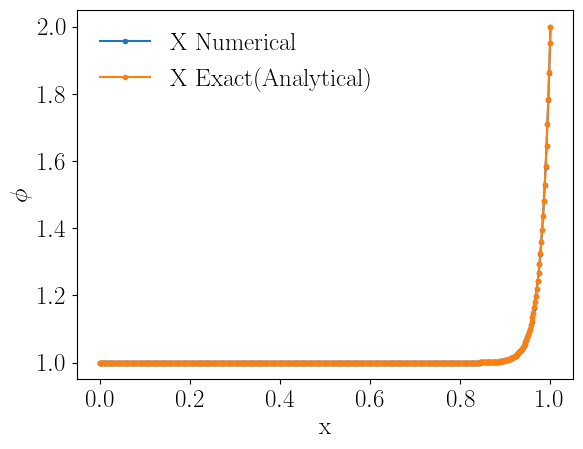

In [11]:
# plot and show graph
# adding initial and final conditions to the list, as list contains values at nodes
X.insert(0, phi_0)
X.append(phi_L)
XA.insert(0, phi_0)
XA.append(phi_L)
XX.insert(0, 0)
XX.append(L)

graph = pd.DataFrame({'X Numerical': X, 'X Exact(Analytical)': XA}, index=XX)
# graph.plot()
plt.plot(graph, marker='.')
plt.xlabel("x")
plt.ylabel(r'$\phi$')
plt.legend(['X Numerical', 'X Exact(Analytical)'], loc='best', frameon = False)
figure = plt.gcf()
plt.show()

In [118]:
np.array(XX)/L

array([0.      , 0.015625, 0.046875, 0.078125, 0.109375, 0.140625,
       0.171875, 0.203125, 0.234375, 0.265625, 0.296875, 0.328125,
       0.359375, 0.390625, 0.421875, 0.453125, 0.484375, 0.515625,
       0.546875, 0.578125, 0.609375, 0.640625, 0.671875, 0.703125,
       0.734375, 0.765625, 0.796875, 0.828125, 0.859375, 0.890625,
       0.921875, 0.953125, 0.984375, 0.984375, 1.      , 1.      ])

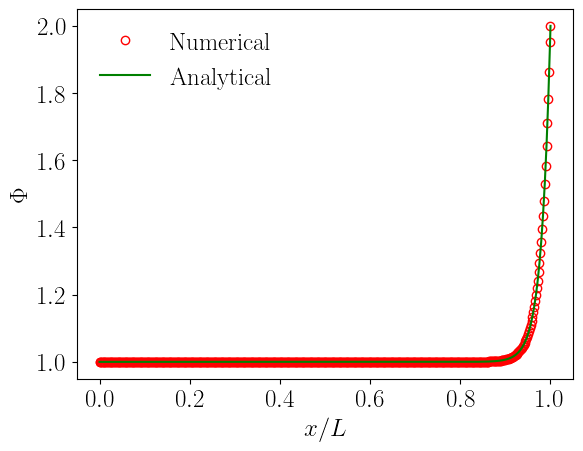

In [13]:
fig, ax = plt.subplots()

ax.plot(np.array(XX)/L, X, c='r', marker = 'o', ls='', markerfacecolor = 'none', label='Numerical')
ax.plot(np.array(XX)/L, XA, c='g', ls='-', label='Analytical')
    
# ax.axvline(0.53, c='k', ls='--', lw=1)
# ax.axhline(0, c='k', ls=':', lw=1)

# ax.set_xlim(0, 1)
# ax.set_ylim(-2.5, 2.5)

ax.legend(loc='best', frameon = False); # or 'best', 'upper right', etc

ax.set_ylabel(r'$\Phi$')
ax.set_xlabel(r'$x/L$')

plt.show()

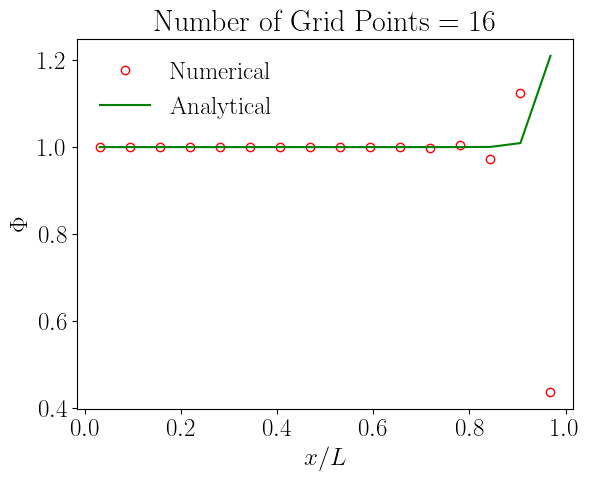

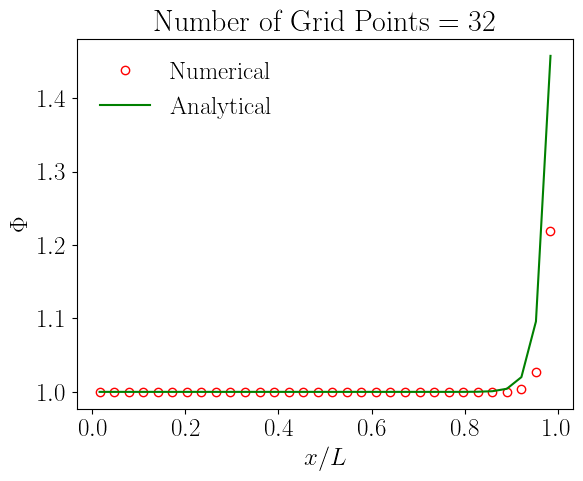

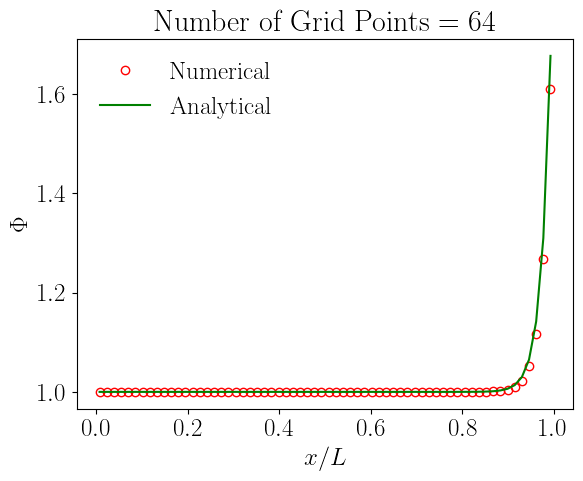

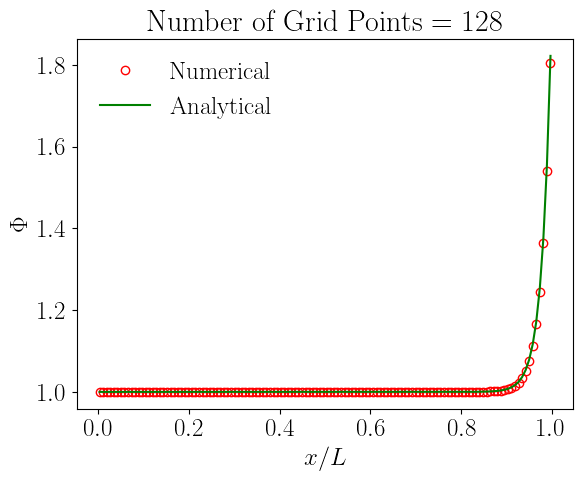

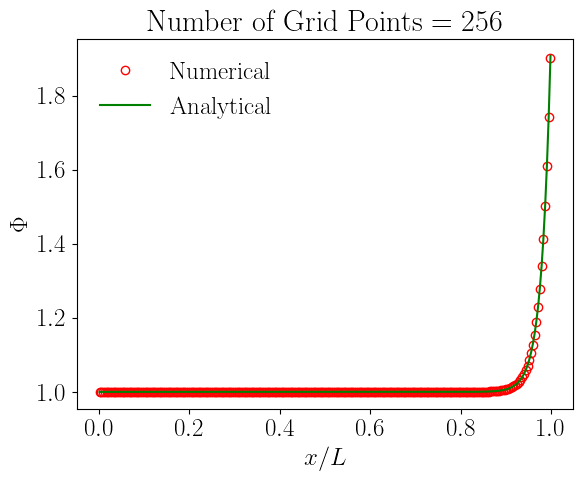

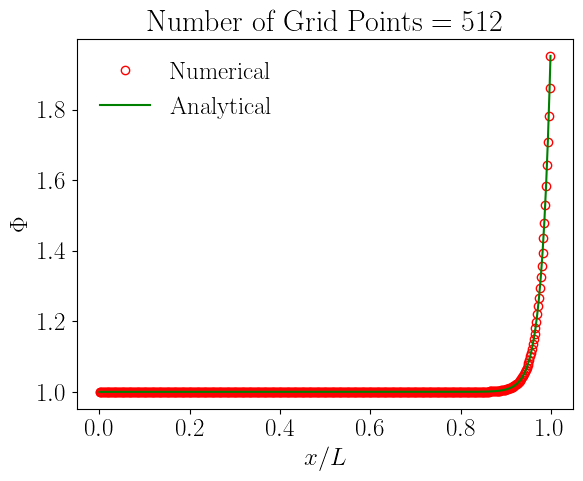

In [127]:
Points = [16, 32, 64, 128, 256, 512]

for i in Points:
    n = i
    dx = L/n
    x = Gamma/dx
    y = rho*u
    D = [0]*n
    beta = [0]*n
    alpha = [0]*n
    c = [0]*n
    A = [0]*n
    C = [0]*n
    X = [0]*n
    XA = [0]*n
    XX = [0]*n
    Err = [0]*n
    CD()
    temp = TDMA(n, beta, D, alpha, c)
    for w in range(0, n):
        XX[w] = dx*0.5 + (dx * w)
        n1 = rho * u * XX[w] / Gamma
        n2 = rho * u * L / Gamma
        XA[w] = phi_0 + (((math.exp(n1)-1)/(math.exp(n2)-1))*(phi_L-phi_0))
        Err[w] = ((XA[w] - X[w]) * 100*2) / (XA[w] + X[w])
    graph = pd.DataFrame({'X Numerical': X, 'X Exact(Analytical)': XA}, index=XX)
    
    fig, ax = plt.subplots()
    ax.plot(np.array(XX)/L, X, c='r', marker = 'o', ls='', markerfacecolor = 'none', label='Numerical')
    ax.plot(np.array(XX)/L, XA, c='g', ls='-', label='Analytical')
    ax.legend(loc='best', frameon = False); # or 'best', 'upper right', etc
    ax.set_title(f'Number of Grid Points = {i}')
    ax.set_ylabel(r'$\Phi$')
    ax.set_xlabel(r'$x/L$')
    plt.show()